In [100]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas_profiling as pp

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Data Cleaning and Formatting

## Load in the Data and Examine

In [6]:
%%time
#loading datasets
diabetic_data = pd.read_csv('diabetic_data.csv')
patient_details = pd.read_excel('Paitent_details.xlsx')
lab_session = pd.read_excel('Lab-session.xlsx')
diagnosis_session = pd.read_excel('Diagnosis_session.xlsx')
admission_details = pd.read_excel('admission_details.xlsx')

Wall time: 22.8 s


In [7]:
diabetic_data.head()

,encounter_id,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,None,None,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,NO
1,149190,None,None,No,No,No,No,No,No,No,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,None,None,No,No,No,No,No,No,Steady,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,None,None,No,No,No,No,No,No,No,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,None,None,No,No,No,No,No,No,Steady,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
diabetic_data.T

,0,1,2,3,4,5,6,7,8,9,...,101756,101757,101758,101759,101760,101761,101762,101763,101764,101765
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738,...,443842070,443842136,443842340,443842778,443847176,443847548,443847782,443854148,443857166,443867222
max_glu_serum,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
A1Cresult,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,>8,None,None,None,None
metformin,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,Steady,No,Steady,No,No
repaglinide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
nateglinide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
chlorpropamide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
glimepiride,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,No,No
acetohexamide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
glipizide,No,No,Steady,No,Steady,No,No,No,Steady,No,...,No,No,No,No,No,No,No,No,Steady,No


In [9]:
patient_details.head()

,encounter_id,patient_nbr,race,gender,age,weight
0,2278392,8222157,Caucasian,Female,[0-10),?
1,149190,55629189,Caucasian,Female,[10-20),?
2,64410,86047875,AfricanAmerican,Female,[20-30),?
3,500364,82442376,Caucasian,Male,[30-40),?
4,16680,42519267,Caucasian,Male,[40-50),?


In [10]:
lab_session.head()

,encounter_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
0,2278392,41,0,1,0,0,0
1,149190,59,0,18,0,0,0
2,64410,11,5,13,2,0,1
3,500364,44,1,16,0,0,0
4,16680,51,0,8,0,0,0


In [11]:
diagnosis_session.head()

,patient_nbr,diag_1,diag_2,diag_3,number_diagnoses
0,8222157,250.83,?,?,1
1,55629189,276,250.01,255,9
2,86047875,648,250,V27,6
3,82442376,8,250.43,403,7
4,42519267,197,157,250,5


In [12]:
admission_details.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty
0,8222157,6,25,1,1,?,Pediatrics-Endocrinology
1,55629189,1,1,7,3,?,?
2,86047875,1,1,7,2,?,?
3,82442376,1,1,7,2,?,?
4,42519267,1,1,7,1,?,?


In [13]:
frames = [diabetic_data, patient_details, lab_session, diagnosis_session, admission_details]

In [14]:
#concatinating all the dataframes in one dataframe

df = pd.concat(frames, join = 'inner', axis = 1)

In [15]:
df = df.loc[:,~df.columns.duplicated()]

In [16]:
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
max_glu_serum,None,None,None,None,None
A1Cresult,None,None,None,None,None
metformin,No,No,No,No,No
repaglinide,No,No,No,No,No
nateglinide,No,No,No,No,No
chlorpropamide,No,No,No,No,No
glimepiride,No,No,No,No,No
acetohexamide,No,No,No,No,No
glipizide,No,No,Steady,No,Steady


In [17]:
df.shape

(101766, 50)

In [18]:
%%time
#pandas pandas_profiling for quick analysis of dataset
#pp.ProfileReport(df)

Wall time: 0 ns


In [19]:
# droping citoglipton and examide features as they both contain same values across all the data points

df.drop(columns = ['citoglipton', 'examide'], inplace = True)

In [20]:
#checking for any null values in any of the dataset features

df.isna().sum()

encounter_id                0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-rosiglitazone     0
metformin-pioglitazone      0
change                      0
diabetesMed                 0
readmitted                  0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
num_lab_procedures          0
num_proced

In [21]:
#finding percentage of invalid values in weight columns

100*(df.weight == '?').sum()/df.shape[0]

96.85847925633315

In [22]:
#droping weight column

df.drop(columns = ['weight'], inplace = True)

In [23]:
# Checking Null values in the Payer_code feature

100*(df.payer_code == '?').sum()/df.shape[0]

39.5574160328597

In [24]:
# Checking Null values in the medical_specialty feature

100*(df.medical_specialty == '?').sum()/df.shape[0]

49.08220820313268

In [25]:
# Checking unique values of gender columns

df.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [26]:
#finding indexes of unknown/invalid gender types

df[df.gender == 'Unknown/Invalid']

,encounter_id,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,...,diag_1,diag_2,diag_3,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty
30506,98634858,None,None,No,No,No,No,No,No,Steady,...,414,411,401,4,3,1,1,1,?,Cardiology
75551,226864668,None,None,No,No,No,No,No,No,No,...,808,873,E813,5,1,1,7,1,CP,?
82573,257364294,None,None,Steady,No,No,No,No,No,No,...,850,805,808,9,1,22,7,8,CP,?


In [27]:
#droping unknown/invalid gender types

df.drop(index = [30506, 75551, 82573], inplace = True)

In [28]:
#droping columns
#weight
#payer_code
#medical_specialty

In [29]:
df.shape

(101763, 47)

In [30]:
df.drop(columns = ['medical_specialty'], inplace = True) 

In [31]:
df.drop(columns = ['payer_code'], inplace = True)

Null values check for diagnosis columns

In [32]:
(df.diag_2 == '?').sum()

358

In [33]:
(df.diag_1 == '?').sum()

21

In [34]:
(df.diag_3 == '?').sum()

1423

In [35]:
features = list(df.columns)

In [36]:
for col in features:
    if (df[col] == '?').sum() > 0:
        print('? in feature ', col, 'are ', round(100*(df[col] == '?').sum()/df.shape[0],2), '%')

C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


? in feature  race are  2.23 %
? in feature  diag_1 are  0.02 %
? in feature  diag_2 are  0.35 %
? in feature  diag_3 are  1.4 %


Null vaues check for Race feature and imputing the missing values with 'Other'

In [37]:
df.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2271
Hispanic            2037
Other               1505
Asian                641
Name: race, dtype: int64

In [38]:
df['race'].replace('?','Other', inplace = True)

In [39]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               3776
Hispanic            2037
Asian                641
Name: race, dtype: int64

Age feature is available in the intervals of 10.
Changing the age range into midpoint of that range

In [40]:
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [41]:
age_dict = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55,
       '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}

In [42]:
df['age'] = df['age'].map(age_dict)

In [44]:
df[df['diabetesMed'] == 'No'].T

,0,22,23,50,70,81,89,105,107,122,...,101682,101690,101694,101696,101697,101711,101730,101741,101744,101765
encounter_id,2278392,182796,183930,550098,870294,1077924,1157574,1414158,1455252,2091690,...,442680734,443127950,443139938,443149208,443149220,443207462,443721236,443787128,443793992,443867222
max_glu_serum,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
A1Cresult,None,None,None,None,None,None,None,None,Norm,None,...,None,None,None,None,None,None,None,None,None,None
metformin,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
repaglinide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
nateglinide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
chlorpropamide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
glimepiride,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
acetohexamide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
glipizide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


#### Why dropping 'diabetesMed' feature ?
The feature 'diabetesMed' implies whether diabetes medicines were prescribed or not. Since, our objective is to check whether 23 drugs or solo insulin worked better for the patient. All the records which where none for these 24 features have been prescribed does not come under the scope of our analysis. So removing the records where features 'diabetesMed' is 'No'. Now, we have records of features where 'diabetesMed' is 'Yes' makes no sense to keep those feature so dropping those features as well.

In [45]:
df['readmitted'].replace('NO', 0, inplace = True)

In [46]:
df['readmitted'].replace(['>30','<30'], 1, inplace = True)

In [47]:
df['insulin'].replace('No', 0, inplace = True)

In [48]:
df['insulin'].replace(['Up', 'Steady', 'Down'], 1, inplace = True)

#### Removimg rows which have insulin is NO

In [49]:
df_insulin = df

In [50]:
df_insulin.shape

(101763, 45)

In [51]:
df_insulin.T

,0,1,2,3,4,5,6,7,8,9,...,101756,101757,101758,101759,101760,101761,101762,101763,101764,101765
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738,...,443842070,443842136,443842340,443842778,443847176,443847548,443847782,443854148,443857166,443867222
max_glu_serum,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
A1Cresult,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,>8,None,None,None,None
metformin,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,Steady,No,Steady,No,No
repaglinide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
nateglinide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
chlorpropamide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
glimepiride,No,No,No,No,No,No,Steady,No,No,No,...,No,No,No,No,No,No,No,No,No,No
acetohexamide,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
glipizide,No,No,Steady,No,Steady,No,No,No,Steady,No,...,No,No,No,No,No,No,No,No,Steady,No


In [52]:
df_with_med = df_insulin[df_insulin['diabetesMed'] != 'No']

## Feature Engineering and Selection

In [53]:
df_with_med.columns

Index(['encounter_id', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'patient_nbr', 'race', 'gender', 'age', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital'],
      dtype='object')

In [54]:
other_medicines = ['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [55]:
df_with_med.shape[0]

78361

In [56]:
df = df_with_med.loc[:,other_medicines]

In [57]:
for col in df.columns:
    df[col].replace(['Up','Steady','Down'], 1, inplace = True)
    df[col].replace('No', 0, inplace = True)

In [58]:
%%time

with_medication_lst = df.sum(axis = 1, skipna = True)

Wall time: 31.9 ms


In [59]:
len(with_medication_lst)

78361

In [60]:
new_med=[]

for i in with_medication_lst:
    if i > 0:
        new_med.append(1)
    else:
        new_med.append(0)

In [61]:
df['with_medication'] = new_med

In [62]:
df['with_medication'].value_counts()

1    47396
0    30965
Name: with_medication, dtype: int64

In [63]:
df.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,acarbose,miglitol,troglitazone,tolazamide,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,with_medication
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Created a single column to indicate whether the any of the 23 drug/ test were given to the patients.
# Dropping these 23 drugs/test features as we have captured all the information from them into 'with_medication' column

df_with_med.drop(columns=other_medicines, axis=1, inplace=True)

C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [66]:
df_with_med['with_medication']=df['with_medication']

C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
df_with_med.head()

,encounter_id,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,patient_nbr,race,gender,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,with_medication
1,149190,None,None,1,Ch,Yes,1,55629189,Caucasian,Female,...,0,276,250.01,255,9,1,1,7,3,0
2,64410,None,None,0,No,Yes,0,86047875,AfricanAmerican,Female,...,1,648,250,V27,6,1,1,7,2,1
3,500364,None,None,1,Ch,Yes,0,82442376,Caucasian,Male,...,0,8,250.43,403,7,1,1,7,2,0
4,16680,None,None,1,Ch,Yes,0,42519267,Caucasian,Male,...,0,197,157,250,5,1,1,7,1,1
5,35754,None,None,1,No,Yes,1,82637451,Caucasian,Male,...,0,414,411,250,9,2,1,2,3,0


In [68]:
# Null values check for 'max_glu_serum' feature.

df_with_med[df_with_med['max_glu_serum']=='None']['max_glu_serum'].count()/df_with_med.shape[0]

0.9498092163193426

In [69]:
df_with_med.head()

,encounter_id,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,patient_nbr,race,gender,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,with_medication
1,149190,None,None,1,Ch,Yes,1,55629189,Caucasian,Female,...,0,276,250.01,255,9,1,1,7,3,0
2,64410,None,None,0,No,Yes,0,86047875,AfricanAmerican,Female,...,1,648,250,V27,6,1,1,7,2,1
3,500364,None,None,1,Ch,Yes,0,82442376,Caucasian,Male,...,0,8,250.43,403,7,1,1,7,2,0
4,16680,None,None,1,Ch,Yes,0,42519267,Caucasian,Male,...,0,197,157,250,5,1,1,7,1,1
5,35754,None,None,1,No,Yes,1,82637451,Caucasian,Male,...,0,414,411,250,9,2,1,2,3,0


In [70]:
df_with_med = df_with_med[~((df_with_med['insulin'] ==1) & (df_with_med['with_medication']==1))]

In [71]:
df_with_med.head()

,encounter_id,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,patient_nbr,race,gender,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,with_medication
1,149190,None,None,1,Ch,Yes,1,55629189,Caucasian,Female,...,0,276,250.01,255,9,1,1,7,3,0
2,64410,None,None,0,No,Yes,0,86047875,AfricanAmerican,Female,...,1,648,250,V27,6,1,1,7,2,1
3,500364,None,None,1,Ch,Yes,0,82442376,Caucasian,Male,...,0,8,250.43,403,7,1,1,7,2,0
5,35754,None,None,1,No,Yes,1,82637451,Caucasian,Male,...,0,414,411,250,9,2,1,2,3,0
7,63768,None,None,0,No,Yes,1,114882984,Caucasian,Male,...,0,428,492,250,8,1,1,7,5,1


In [72]:
df_with_med.shape

(54943, 26)

In [73]:
df_with_med['with_medication'].groupby(df_with_med['insulin']).sum()

insulin
0    23978
1        0
Name: with_medication, dtype: int64

In [74]:
df_with_med['insulin'].groupby(df_with_med['with_medication']).sum()

with_medication
0    30965
1        0
Name: insulin, dtype: int64

In [75]:
# solo-insulin treatment is 1 and other drugs treatment is 0 

df_with_med['Treatment_type']= np.where(df_with_med['insulin'] == 1, 1,0)

In [76]:
df_with_med.head(10)

,encounter_id,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,patient_nbr,race,gender,...,diag_1,diag_2,diag_3,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,with_medication,Treatment_type
1,149190,None,None,1,Ch,Yes,1,55629189,Caucasian,Female,...,276,250.01,255,9,1,1,7,3,0,1
2,64410,None,None,0,No,Yes,0,86047875,AfricanAmerican,Female,...,648,250,V27,6,1,1,7,2,1,0
3,500364,None,None,1,Ch,Yes,0,82442376,Caucasian,Male,...,8,250.43,403,7,1,1,7,2,0,1
5,35754,None,None,1,No,Yes,1,82637451,Caucasian,Male,...,414,411,250,9,2,1,2,3,0,1
7,63768,None,None,0,No,Yes,1,114882984,Caucasian,Male,...,428,492,250,8,1,1,7,5,1,0
10,28236,None,None,1,No,Yes,1,89869032,AfricanAmerican,Female,...,250.7,403,996,9,1,1,7,9,0,1
13,42570,None,None,1,No,Yes,0,77586282,Caucasian,Male,...,428,411,427,8,1,6,7,10,0,1
14,62256,None,None,1,No,Yes,1,49726791,AfricanAmerican,Female,...,518,998,627,8,3,1,2,1,0,1
15,73578,None,None,1,Ch,Yes,0,86328819,AfricanAmerican,Male,...,999,507,996,9,1,3,7,12,0,1
17,84222,None,None,0,No,Yes,0,108662661,Caucasian,Female,...,682,174,250,3,1,1,7,3,1,0


In [77]:
df_with_med.drop(['with_medication'], axis = 1, inplace = True)

In [78]:
df_with_med['gender'] = df_with_med['gender'].replace('Male',1)
df_with_med['gender'] = df_with_med['gender'].replace('Female',0)

In [79]:
df_with_med['change'] = df_with_med['change'].replace('Ch',1)
df_with_med['change'] = df_with_med['change'].replace('No',0)

In [80]:
# Imputing all the ? in diag_1, diag_2 and diag_3 with mode 

df_with_med['diag_1'].replace('?', -1, inplace=True)
df_with_med['diag_2'].replace('?', -1, inplace=True)
df_with_med['diag_3'].replace('?', -1, inplace=True)

In [81]:
#Function to map values of daig_1, diag_2, diag_3

def categorizeICD9(x):
    if 'V' in str(x):
        return 'Supplementary Classification of External Causes of Injury and Poisoning'
    elif "E" in str(x):
        return 'Supplementary Classification of Factors influencing Health Status and Contact with Health Services'
    elif int(x) == -1:
        return 'Unknown'
    elif int(x) >= 0 and int(x) <= 139:
        return "Infectious and Parasitic Diseases"
    elif int(x) >=140 and int(x)<= 239:
        return 'Neoplasms'
    elif int(x) >= 240 and int(x)<= 279:
        return 'Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders'
    elif int(x) >=280 and int(x)<=289:
        return 'Diseases of the Blood and Blood-forming Organs'
    elif int(x) >=290 and int(x)<=319:
        return 'Mental Disorders'
    elif int(x) >=320 and int(x)<=389:
        return 'Diseases of the Nervous System and Sense Organs'
    elif int(x) >= 390 and int(x)<= 459:
        return 'Diseases of the Circulatory System'
    elif int(x) >=460 and int(x)<= 519:
        return 'Diseases of the Respiratory System'
    elif int(x) >= 520 and int(x)<= 579:
        return 'Diseases of the Digestive System'
    elif int(x) >=580 and int(x)<= 629:
        return 'Diseases of the Genitourinary System'
    elif int(x) >= 630 and int(x)<= 679:
        return 'Complications of Pregnancy, Childbirth, and the Puerperium'
    elif int(x) >= 680 and int(x)<= 709:
        return 'Diseases of the Skin and Subcutaneous Tissue'
    elif int(x)>=710 and int(x)<= 739:
        return 'Diseases of the Musculoskeletal System and Connective Tissue'
    elif int(x) >=740 and int(x)<=759:
        return 'Congenital Anomalies'
    elif int(x) >=760 and int(x)<=779:
        return 'Certain Conditions originating in the Perinatal Period'
    elif int(x) >=780 and int(x)<= 799:
        return 'Symptoms, Signs and Ill-defined Conditions'
    elif int(x)>=800 and int(x)<= 999:
        return 'Injury and Poisoning'
    else:
        return 'Others'

In [82]:
# converting series to list to work with apply function
diag_1_list = list(df_with_med['diag_1'])
diag_2_list = list(df_with_med['diag_2'])
diag_3_list = list(df_with_med['diag_3'])

In [83]:
df_with_med['diag_1'] = df_with_med['diag_1'].apply(categorizeICD9, diag_1_list)

In [84]:
df_with_med['diag_2'] = df_with_med['diag_2'].apply(categorizeICD9, diag_2_list)

In [85]:
df_with_med['diag_3'] = df_with_med['diag_3'].apply(categorizeICD9, diag_3_list)

In [86]:
df_with_med['diag_1'].value_counts()

Diseases of the Circulatory System                                         16234
Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders       6875
Diseases of the Respiratory System                                          5344
Diseases of the Digestive System                                            4718
Symptoms, Signs and Ill-defined Conditions                                  4224
Injury and Poisoning                                                        3687
Diseases of the Genitourinary System                                        2829
Diseases of the Musculoskeletal System and Connective Tissue                2655
Neoplasms                                                                   1674
Infectious and Parasitic Diseases                                           1495
Mental Disorders                                                            1335
Diseases of the Skin and Subcutaneous Tissue                                1324
Supplementary Classification

In [87]:
df_with_med['diag_2'].value_counts()

Diseases of the Circulatory System                                                                    16781
Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders                                 11618
Diseases of the Respiratory System                                                                     5328
Diseases of the Genitourinary System                                                                   4357
Symptoms, Signs and Ill-defined Conditions                                                             2455
Diseases of the Digestive System                                                                       2065
Diseases of the Skin and Subcutaneous Tissue                                                           1986
Diseases of the Blood and Blood-forming Organs                                                         1517
Mental Disorders                                                                                       1495
Neoplasms                   

In [88]:
df_with_med['diag_3'].value_counts()

Diseases of the Circulatory System                                                                    16122
Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders                                 14344
Diseases of the Respiratory System                                                                     3532
Diseases of the Genitourinary System                                                                   3452
Symptoms, Signs and Ill-defined Conditions                                                             2435
Supplementary Classification of External Causes of Injury and Poisoning                                2156
Diseases of the Digestive System                                                                       1925
Mental Disorders                                                                                       1709
Diseases of the Skin and Subcutaneous Tissue                                                           1374
Diseases of the Blood and Bl

In [89]:
max_glu_serum_dict = {'None':0, 'Norm':100, '>200':200, '>300':300}

In [90]:
df_with_med['max_glu_serum'].replace(max_glu_serum_dict, inplace = True)

In [91]:
A1Cresult_dict = {'None':0, 'Norm':5, '>7':7, '>8':8}

In [92]:
df_with_med['A1Cresult'].replace(A1Cresult_dict, inplace = True)

In [93]:
%%time

df_with_med.to_excel("df_with_med.xlsx")

Wall time: 16.8 s


In [94]:
df_with_med.columns

Index(['encounter_id', 'max_glu_serum', 'A1Cresult', 'insulin', 'change',
       'diabetesMed', 'readmitted', 'patient_nbr', 'race', 'gender', 'age',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'Treatment_type'],
      dtype='object')

## Exploratory Data Analysis

In [95]:
df_with_med.dtypes

encounter_id                 int64
max_glu_serum                int64
A1Cresult                    int64
insulin                      int64
change                       int64
diabetesMed                 object
readmitted                   int64
patient_nbr                  int64
race                        object
gender                       int64
age                          int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
Treatment_type               int32
dtype: object

In [96]:
df_with_med.head().T

,1,2,3,5,7
encounter_id,149190,64410,500364,35754,63768
max_glu_serum,0,0,0,0,0
A1Cresult,0,0,0,0,0
insulin,1,0,1,1,0
change,1,0,1,0,0
diabetesMed,Yes,Yes,Yes,Yes,Yes
readmitted,1,0,0,1,1
patient_nbr,55629189,86047875,82442376,82637451,114882984
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,0,0,1,1,1


In [97]:
len(set(df_with_med['patient_nbr']))

41524

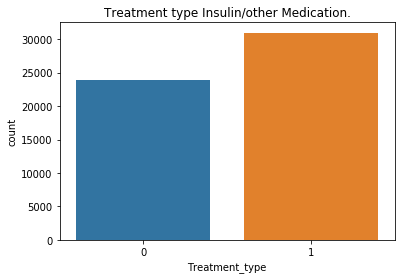

In [104]:
sns.countplot(df_with_med['Treatment_type'])
plt.title("Treatment type Insulin/other Medication.")
plt.show()

In [105]:
df_with_med['Treatment_type'].value_counts()

1    30965
0    23978
Name: Treatment_type, dtype: int64

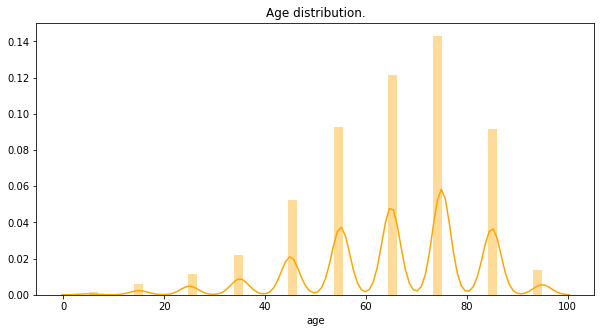

In [108]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df_with_med['age'], color = 'ORANGE', ax=ax)
plt.title('Age distribution.')
plt.show()

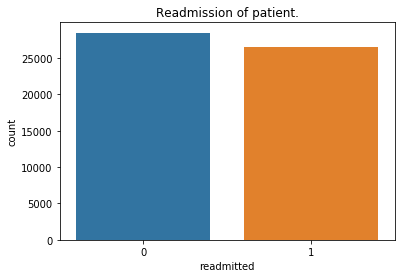

In [109]:
sns.countplot(df_with_med['readmitted'])
plt.title('Readmission of patient.')
plt.show()

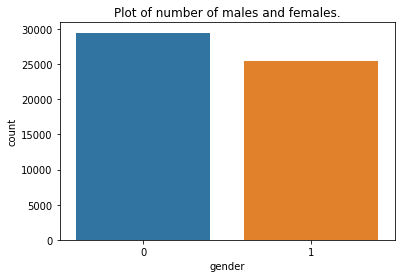

In [110]:
sns.countplot(df_with_med['gender'])
plt.title('Plot of number of males and females.')
plt.show()

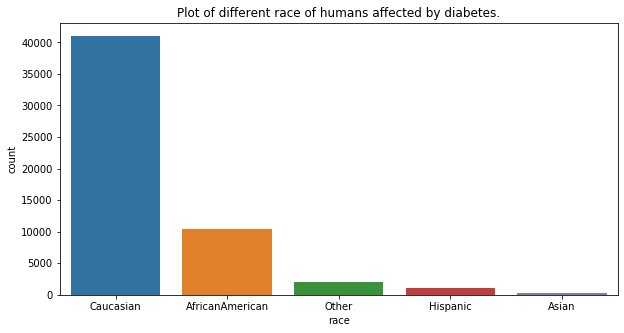

In [112]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(df_with_med['race'])
plt.title('Plot of different race of humans affected by diabetes.')
plt.show()

In [113]:
df_with_med.groupby(['change'])['change'].count().to_frame()

,change
change,
0,31352
1,23591


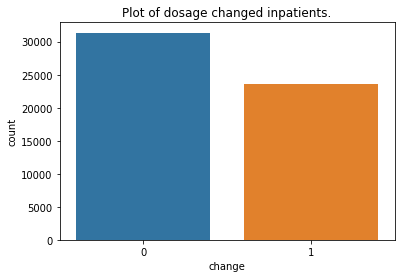

In [114]:
ax = sns.countplot(df_with_med['change'])

#ax.text(0.001,25000, s = '23591')
plt.title('Plot of dosage changed inpatients.')
plt.show()

In [115]:
df = df_with_med.groupby('patient_nbr')['encounter_id'].count()

In [116]:
df_with_med['diag_1'].unique()

array(['Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders',
       'Complications of Pregnancy, Childbirth, and the Puerperium',
       'Infectious and Parasitic Diseases',
       'Diseases of the Circulatory System',
       'Diseases of the Respiratory System', 'Injury and Poisoning',
       'Diseases of the Skin and Subcutaneous Tissue',
       'Symptoms, Signs and Ill-defined Conditions', 'Neoplasms',
       'Diseases of the Genitourinary System',
       'Diseases of the Musculoskeletal System and Connective Tissue',
       'Diseases of the Digestive System', 'Mental Disorders',
       'Supplementary Classification of External Causes of Injury and Poisoning',
       'Diseases of the Blood and Blood-forming Organs',
       'Diseases of the Nervous System and Sense Organs', 'Unknown',
       'Congenital Anomalies'], dtype=object)

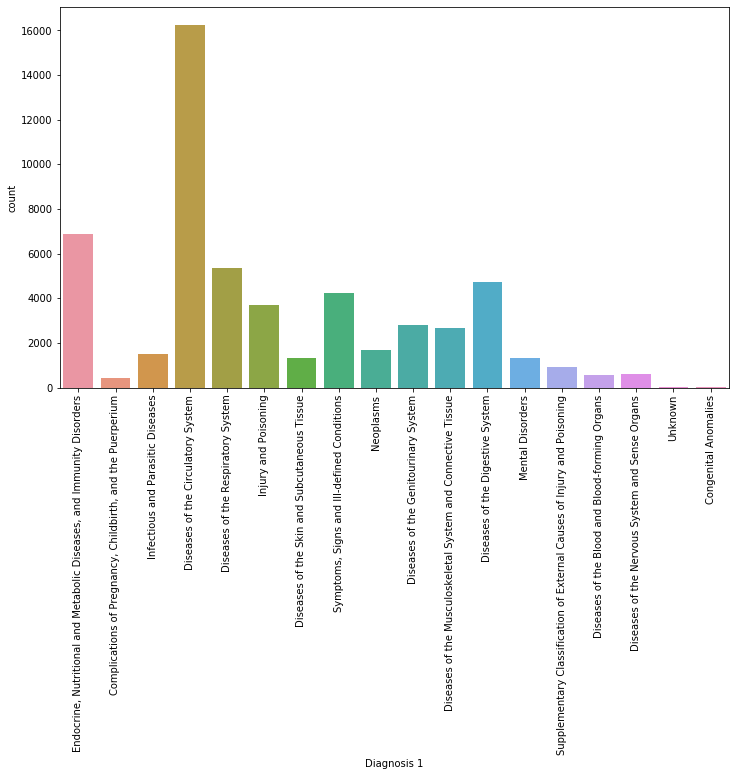

In [117]:
f, ax = plt.subplots(figsize = (12,7))
sns.countplot(df_with_med['diag_1'])
plt.xticks(rotation = 90)
#plt.legend(title = 'Diagnosis', loc = 'upper right', labels = ['A','B'])
plt.xlabel('Diagnosis 1')
plt.show()

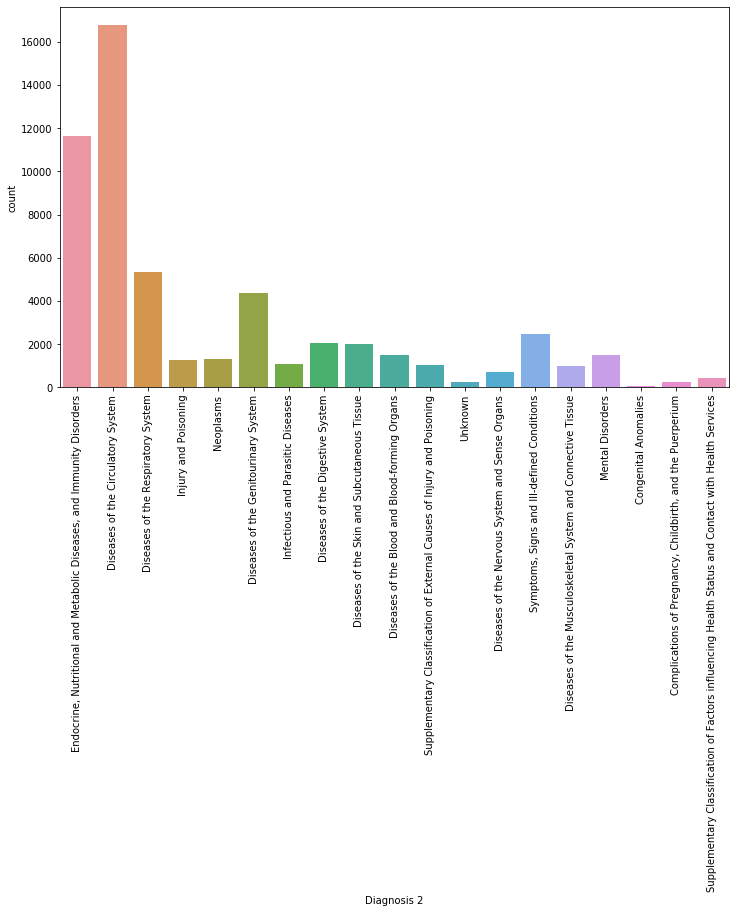

In [118]:
f, ax = plt.subplots(figsize = (12,7))
sns.countplot(df_with_med['diag_2'])
plt.xticks(rotation = 90)
plt.xlabel('Diagnosis 2')
plt.show()

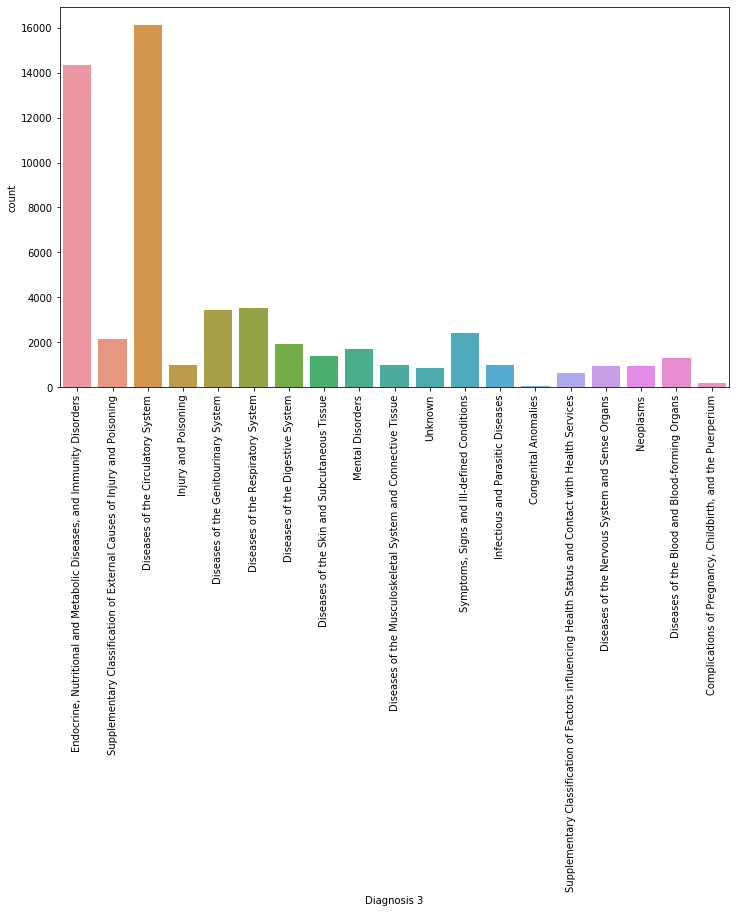

In [119]:
f, ax = plt.subplots(figsize = (12,7))
sns.countplot(df_with_med['diag_3'])
plt.xticks(rotation = 90)
plt.xlabel('Diagnosis 3')
plt.show()

In [120]:
df = df_with_med.groupby(['age'])['Treatment_type'].sum().to_frame()

In [121]:
df.reset_index(inplace = True)
df

,age,Treatment_type
0,5,133
1,15,544
2,25,1054
3,35,1622
4,45,3309
5,55,5256
6,65,6491
7,75,7085
8,85,4697
9,95,774


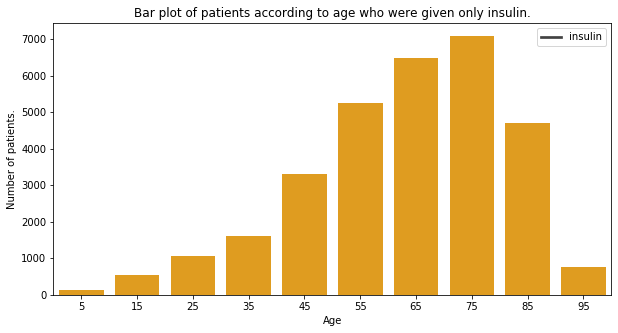

In [123]:
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(df['age'], df['Treatment_type'], color = 'ORANGE')
plt.title('Bar plot of patients according to age who were given only insulin.')
plt.legend(labels = ['insulin'])
plt.ylabel('Number of patients.')
plt.xlabel('Age')
plt.show()

In [124]:
df = df_with_med.groupby(['age','Treatment_type'])['Treatment_type'].sum()

In [125]:
df_with_med.head()

,encounter_id,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,patient_nbr,race,gender,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,Treatment_type
1,149190,0,0,1,1,Yes,1,55629189,Caucasian,0,...,0,"Endocrine, Nutritional and Metabolic Diseases,...","Endocrine, Nutritional and Metabolic Diseases,...","Endocrine, Nutritional and Metabolic Diseases,...",9,1,1,7,3,1
2,64410,0,0,0,0,Yes,0,86047875,AfricanAmerican,0,...,1,"Complications of Pregnancy, Childbirth, and th...","Endocrine, Nutritional and Metabolic Diseases,...",Supplementary Classification of External Cause...,6,1,1,7,2,0
3,500364,0,0,1,1,Yes,0,82442376,Caucasian,1,...,0,Infectious and Parasitic Diseases,"Endocrine, Nutritional and Metabolic Diseases,...",Diseases of the Circulatory System,7,1,1,7,2,1
5,35754,0,0,1,0,Yes,1,82637451,Caucasian,1,...,0,Diseases of the Circulatory System,Diseases of the Circulatory System,"Endocrine, Nutritional and Metabolic Diseases,...",9,2,1,2,3,1
7,63768,0,0,0,0,Yes,1,114882984,Caucasian,1,...,0,Diseases of the Circulatory System,Diseases of the Respiratory System,"Endocrine, Nutritional and Metabolic Diseases,...",8,1,1,7,5,0


In [126]:
df_diag_1_dummies = pd.get_dummies(df_with_med['diag_1'], prefix = 'diag_1_', drop_first = True)

In [127]:
df_diag_2_dummies = pd.get_dummies(df_with_med['diag_2'], prefix = 'diag_2_', drop_first = True)

In [128]:
df_diag_3_dummies = pd.get_dummies(df_with_med['diag_3'], prefix = 'diag_3_', drop_first = True)

In [129]:
df_race_dummies = pd.get_dummies(df_with_med['race'], prefix = 'race_', drop_first = True)

In [130]:
df_concat = pd.concat([df_with_med, df_race_dummies, df_diag_1_dummies, df_diag_2_dummies, df_diag_3_dummies], join = 'outer',axis = 1,
                     sort = False)

In [131]:
df_concat.drop(['diabetesMed'], axis = 1, inplace = True)

In [132]:
df_concat.drop(['race', 'diag_1', 'diag_2', 'diag_3','insulin'], axis = 1, inplace = True)

In [133]:
df_concat.head().T

,1,2,3,5,7
encounter_id,149190,64410,500364,35754,63768
max_glu_serum,0,0,0,0,0
A1Cresult,0,0,0,0,0
change,1,0,1,0,0
readmitted,1,0,0,1,1
patient_nbr,55629189,86047875,82442376,82637451,114882984
gender,0,0,1,1,1
age,15,25,35,55,75
num_lab_procedures,59,11,44,31,73
num_procedures,0,5,1,6,0


In [134]:
df_concat.columns

Index(['encounter_id', 'max_glu_serum', 'A1Cresult', 'change', 'readmitted',
       'patient_nbr', 'gender', 'age', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'Treatment_type', 'race__Asian', 'race__Caucasian', 'race__Hispanic',
       'race__Other', 'diag_1__Congenital Anomalies',
       'diag_1__Diseases of the Blood and Blood-forming Organs',
       'diag_1__Diseases of the Circulatory System',
       'diag_1__Diseases of the Digestive System',
       'diag_1__Diseases of the Genitourinary System',
       'diag_1__Diseases of the Musculoskeletal System and Connective Tissue',
       'diag_1__Diseases of the Nervous System and Sense Organs',
       'diag_1__Diseases of the Respiratory System',
       'diag_1__Diseases of the Skin and Subcutaneous Tissue',
       'diag_1_

In [135]:
X = df_concat.drop(['Treatment_type','encounter_id','patient_nbr'], axis = 1)
y = df_concat['Treatment_type']

In [136]:
X.shape

(54943, 74)

In [137]:
y.shape

(54943,)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [139]:
# Display sizes of data
print('Training Feature Size: ', X_train.shape)
print('Testing Feature Size:  ', X_test.shape)
print('Training Labels Size:  ', y_train.shape)
print('Testing Labels Size:   ', y_test.shape)

Training Feature Size:  (38460, 74)
Testing Feature Size:   (16483, 74)
Training Labels Size:   (38460,)
Testing Labels Size:    (16483,)


In [140]:
X_train.head().T

,61153,52718,62605,27636,37258
max_glu_serum,0,0,0,100,0
A1Cresult,0,0,8,0,0
change,1,0,1,1,1
readmitted,0,1,0,0,1
gender,1,1,1,0,1
age,65,45,65,75,85
num_lab_procedures,40,62,43,9,45
num_procedures,2,6,0,0,1
num_medications,30,31,20,13,12
number_outpatient,0,0,0,0,2


In [141]:
# Saving the files

X_train.to_csv("data/X_train.csv" , index=False)
X_test.to_csv("data/X_test.csv", index=False)
y_train.to_csv("data/y_train.csv", index=False)
y_test.to_csv("data/y_test.csv", index=False)

C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """
C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


## Establish a Baseline 

In [142]:
# Applying KNN Algorithm

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)    
y_pred = knn_model.predict(X_test)
knn_score = accuracy_score(y_test, y_pred)
kn = roc_auc_score(y_test, y_pred)
fkn = f1_score(y_test, y_pred)

In [143]:
print(confusion_matrix(y_test, y_pred))

[[3827 3257]
 [3160 6239]]


In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.54      0.54      7084
           1       0.66      0.66      0.66      9399

    accuracy                           0.61     16483
   macro avg       0.60      0.60      0.60     16483
weighted avg       0.61      0.61      0.61     16483



In [145]:
# Applying Logistic Regression

l_model = LogisticRegression()
l_model.fit(X_train, y_train)    
y_pred = l_model.predict(X_test)
log_score = accuracy_score(y_test, y_pred)
l = roc_auc_score(y_test, y_pred)
fl = f1_score(y_test, y_pred)

C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [146]:
print(confusion_matrix(y_test, y_pred))

[[3999 3085]
 [2447 6952]]


In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59      7084
           1       0.69      0.74      0.72      9399

    accuracy                           0.66     16483
   macro avg       0.66      0.65      0.65     16483
weighted avg       0.66      0.66      0.66     16483



In [148]:
# Applying Decision Regression

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
y_pred = dec_tree.predict(X_test)
dec_score = accuracy_score(y_test,y_pred)
d = roc_auc_score(y_test, y_pred)
fd = f1_score(y_test, y_pred)

In [149]:
print(confusion_matrix(y_test, y_pred))

[[3863 3221]
 [3298 6101]]


In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.55      0.54      7084
           1       0.65      0.65      0.65      9399

    accuracy                           0.60     16483
   macro avg       0.60      0.60      0.60     16483
weighted avg       0.61      0.60      0.60     16483



In [151]:
# Applying Random Forest

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf_score = accuracy_score(y_test, y_pred)
r = roc_auc_score(y_test, y_pred)
fr = f1_score(y_test, y_pred)

C:\Users\Nikhil Darade\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [152]:
print(confusion_matrix(y_test, y_pred))

[[4610 2474]
 [3254 6145]]


In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.65      0.62      7084
           1       0.71      0.65      0.68      9399

    accuracy                           0.65     16483
   macro avg       0.65      0.65      0.65     16483
weighted avg       0.66      0.65      0.65     16483



In [154]:
# Applying Bagging Classifier

bg = BaggingClassifier()
bg.fit(X_train,y_train)
y_pred = bg.predict(X_test)
bg_score = accuracy_score(y_test,y_pred)
b=roc_auc_score(y_test, y_pred)
fb = f1_score(y_test, y_pred)

In [155]:
print(confusion_matrix(y_test, y_pred))

[[4555 2529]
 [3326 6073]]


In [156]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61      7084
           1       0.71      0.65      0.67      9399

    accuracy                           0.64     16483
   macro avg       0.64      0.64      0.64     16483
weighted avg       0.65      0.64      0.65     16483



In [157]:
# Applying Adaboost Classifier

ad = AdaBoostClassifier()
ad.fit(X_train,y_train)
y_pred = ad.predict(X_test)
ad_score = accuracy_score(y_test,y_pred)
a = roc_auc_score(y_test, y_pred)
fa= f1_score(y_test, y_pred)

In [158]:
print(confusion_matrix(y_test, y_pred))

[[4162 2922]
 [2438 6961]]


In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61      7084
           1       0.70      0.74      0.72      9399

    accuracy                           0.67     16483
   macro avg       0.67      0.66      0.67     16483
weighted avg       0.67      0.67      0.67     16483



In [160]:
# Applying Gradient Boosting Classifier

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
gb_score = accuracy_score(y_test,y_pred)
g= roc_auc_score(y_test, y_pred)
fg = f1_score(y_test, y_pred)

In [161]:
print(confusion_matrix(y_test, y_pred))

[[4134 2950]
 [2217 7182]]


In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.58      0.62      7084
           1       0.71      0.76      0.74      9399

    accuracy                           0.69     16483
   macro avg       0.68      0.67      0.68     16483
weighted avg       0.68      0.69      0.68     16483



In [163]:
# Applying XGBoost Classifier

xg = XGBClassifier()
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
xg_score = accuracy_score(y_test,y_pred)
x= roc_auc_score(y_test, y_pred)
fx = f1_score(y_test, y_pred)

In [164]:
print(confusion_matrix(y_test, y_pred))

[[4147 2937]
 [2249 7150]]


In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62      7084
           1       0.71      0.76      0.73      9399

    accuracy                           0.69     16483
   macro avg       0.68      0.67      0.67     16483
weighted avg       0.68      0.69      0.68     16483



In [166]:
acc_df = pd.DataFrame({'Classifier':['Logistic Regression','K-Nearest Neighbor','Decision tree  Classifier', 'Random Forest Classifier','Bagging Classifier','Adaboost Classifier','Gradient Boosting Classifier','XGBoost Classifier'],
                      'accuracy score': [log_score, knn_score,dec_score,rf_score, bg_score,ad_score,gb_score,xg_score], 'roc_auc score': [l,kn,d,r,b,a,g,x],
                       'f1 score':[fl,fkn,fd,fr,fb,fa,fg,fx]})
acc_df

,Classifier,accuracy score,roc_auc score,f1 score
0,Logistic Regression,0.664381,0.652082,0.715374
1,K-Nearest Neighbor,0.610690,0.602013,0.660386
2,Decision tree Classifier,0.604502,0.597212,0.651781
3,Random Forest Classifier,0.652490,0.652278,0.682096
4,Bagging Classifier,0.644786,0.644565,0.674740
5,Adaboost Classifier,0.674816,0.664066,0.722021
6,Gradient Boosting Classifier,0.686526,0.673846,0.735446
7,XGBoost Classifier,0.685373,0.673061,0.733860


### Inference:

* Of the  baseline classification models applied to the data, we observe that Gradient Boosting and Xgboost Classifiers performed better.

# Conclusions:
 
 * In this Jupyter Notebook, we tried to

1. Cleaned and formatted the raw data 

2. Performed an exploratory data analysis

3. Developed a set of features to train our model using feature engineering and feature selection

We also completed the crucial task of establishing a baseline metric so we can determine if our model is better

### Next Steps:
    In part two, we will focus on implementing several machine learning methods, selecting the best model, and optimizing it for our problem using hyperparameter tuning with cross validation. As a final step here, we will save the datasets we developed to use again in the next part.